In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
from bs4 import UnicodeDammit
with open('SYB66_314_202310_Internet Usage.csv', 'rb') as file:
   content = file.read()

suggestion = UnicodeDammit(content)
suggestion.original_encoding

'utf-8'

In [3]:
data = pd.read_csv("SYB66_314_202310_Internet Usage.csv", sep = ",", encoding='windows-1252')
pivot = data.pivot(index="Unnamed: 1", columns="Year", values="Value").reset_index()
pivot = pivot.rename(columns={"Unnamed: 1": "country"})
select_columns = ["country", 2000, 2005, 2010, 2015, 2020]
pivot = pivot[select_columns]
pivot = pivot.rename(columns={2000: "2000-2004", 2005: "2005-2009", 2010: "2010-2014", 2015: "2015-2019", 2020: "2020-2022"})

pivot.head()

Year,country,2000-2004,2005-2009,2010-2014,2015-2019,2020-2022
0,Afghanistan,NaN,1.2,4.0,8.3,18.4
1,Albania,0.1,6.0,45.0,56.9,72.2
2,Algeria,0.5,5.8,12.5,38.2,64.0
3,Andorra,10.5,37.6,81.0,87.9,93.2
4,Angola,0.1,1.1,2.8,22.0,32.6


In [4]:
zf = zipfile.ZipFile('GEDEvent_v23_1.csv.zip') 
df = pd.read_csv(zf.open('GEDEvent_v23_1.csv'))

/tmp/ipykernel_4533/3301354906.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('GEDEvent_v23_1.csv'))


In [5]:
select_columns = ['id', 'year', 'type_of_violence', 'conflict_name', 'dyad_name', 'side_a', 'side_b',
                  'where_coordinates', 'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude', 'geom_wkt', 'country', 'region',
                  'date_start', 'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians', 'best']

df_conflict = df[select_columns]

pivot2 = pd.pivot_table(df_conflict, values="best", index="country", columns="year", aggfunc="sum", fill_value=0).reset_index()

pivot2[1990] = pivot2[1990] + pivot2[1991] + pivot2[1992] + pivot2[1993] + pivot2[1994]
pivot2[1995] = pivot2[1995] + pivot2[1996] + pivot2[1997] + pivot2[1998] + pivot2[1999]
pivot2[2000] = pivot2[2000] + pivot2[2001] + pivot2[2002] + pivot2[2003] + pivot2[2004]
pivot2[2005] = pivot2[2005] + pivot2[2006] + pivot2[2007] + pivot2[2008] + pivot2[2009]
pivot2[2010] = pivot2[2010] + pivot2[2011] + pivot2[2012] + pivot2[2013] + pivot2[2014]
pivot2[2015] = pivot2[2015] + pivot2[2016] + pivot2[2017] + pivot2[2018] + pivot2[2019]
pivot2[2020] = pivot2[2020] + pivot2[2021] + pivot2[2022]
select_columns = ["country", 1990, 1995, 2000, 2005, 2010, 2015, 2020]
pivot2 = pivot2[select_columns]
pivot2 = pivot2.rename(columns={1990: "1990-1994", 1995: "1995-1999", 2000: "2000-2004", 2005: "2005-2009", 2010: "2010-2014", 2015: "2015-2019", 2020: "2020-2022"})

pivot2.head()


year,country,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,2020-2022
0,Afghanistan,22613,33173,13865,25877,43177,113811,58765
1,Albania,0,6,0,0,0,0,0
2,Algeria,3078,10610,4139,1905,1125,326,60
3,Angola,21884,4232,4068,73,13,103,62
4,Argentina,86,0,0,0,0,0,0


In [6]:
countries_internet = pivot.country.unique()
countries_conflict = pivot2.country.unique()

countries = [c for c in countries_internet if c in countries_conflict]
drop_countries = [c for c in countries_internet if c not in countries_conflict] + [c for c in countries_conflict if c not in countries_internet]
drop_countries

['Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Australia and New Zealand',
 'Bahamas',
 'Barbados',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia (Plurin. State of)',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Cabo Verde',
 'Cambodia',
 'Caribbean',
 'Cayman Islands',
 'Central Asia',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Cook Islands',
 'Costa Rica',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Cï¿½te dï¿½Ivoire',
 "Dem. People's Rep. Korea",
 'Dem. Rep. of the Congo',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Eastern Africa',
 'Eastern Asia',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Europe',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Iran (Islamic Republic of)',
 'Ireland',
 'Japan',
 'Jersey',
 'Kazakhstan',
 '

In [8]:
#df = df[df.rebounds.isin(values) == False]

pivot = pivot[pivot.country.isin(drop_countries) == False].reset_index()
pivot2 = pivot2[pivot2.country.isin(drop_countries) == False].reset_index()
pivot2
pivot

Year,level_0,index,country,2000-2004,2005-2009,2010-2014,2015-2019,2020-2022
0,0,0,Afghanistan,NaN,1.2,4.0,8.3,18.4
1,1,1,Albania,0.1,6.0,45.0,56.9,72.2
2,2,2,Algeria,0.5,5.8,12.5,38.2,64.0
3,3,4,Angola,0.1,1.1,2.8,22.0,32.6
4,4,7,Argentina,7.0,17.7,45.0,68.0,85.5
...,...,...,...,...,...,...,...,...
98,98,226,United Arab Emirates,23.6,40.0,68.0,90.5,100.0
99,99,227,United Kingdom,26.8,70.0,85.0,92.0,94.8
100,100,230,United States of America,43.1,68.0,71.7,74.6,90.6
101,101,232,Uzbekistan,0.5,3.3,15.9,42.8,71.1


In [38]:
# pivot.compare(pivot2, keep_shape=True, keep_equal=True)


In [11]:
df2 = pd.DataFrame(countries)
df2 = df2.rename(columns={0: "country"})
df3 = pd.DataFrame(countries)
df3 = df3.rename(columns={0: "country"})


In [12]:
df2["1990-1994"] = pivot2["1990-1994"]
df2["1995-1999"] = pivot2["1995-1999"]
df2["2000-2004"] = pivot2["2000-2004"]
df2["2005-2009"] = pivot2["2005-2009"]
df2["2010-2014"] = pivot2["2010-2014"]
df2["2015-2019"] = pivot2["2015-2019"]
df2["2020-2022"] = pivot2["2020-2022"]
df_conflict = df2

df3["2000-2004"] = pivot["2000-2004"]
df3["2005-2009"] = pivot["2005-2009"]
df3["2010-2014"] = pivot["2010-2014"]
df3["2015-2019"] = pivot["2015-2019"]
df3["2020-2022"] = pivot["2020-2022"]
df_internet = df3
df_internet


,country,2000-2004,2005-2009,2010-2014,2015-2019,2020-2022
0,Afghanistan,NaN,1.2,4.0,8.3,18.4
1,Albania,0.1,6.0,45.0,56.9,72.2
2,Algeria,0.5,5.8,12.5,38.2,64.0
3,Angola,0.1,1.1,2.8,22.0,32.6
4,Argentina,7.0,17.7,45.0,68.0,85.5
...,...,...,...,...,...,...
98,United Arab Emirates,23.6,40.0,68.0,90.5,100.0
99,United Kingdom,26.8,70.0,85.0,92.0,94.8
100,United States of America,43.1,68.0,71.7,74.6,90.6
101,Uzbekistan,0.5,3.3,15.9,42.8,71.1


<Axes: >

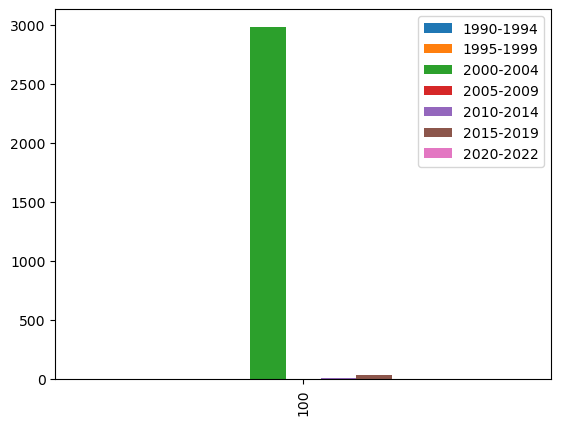

In [22]:
df_conflict[df_conflict.country.values == "United States of America"].plot(kind = "bar")

In [128]:
for c in df["country"]:
    print(c)

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belgium
Benin
Bhutan
Botswana
Brazil
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chad
China
Colombia
Comoros
Congo
Croatia
Djibouti
Ecuador
Egypt
El Salvador
Eritrea
Ethiopia
France
Gambia
Georgia
Germany
Ghana
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Iraq
Israel
Italy
Jamaica
Jordan
Kenya
Kuwait
Kyrgyzstan
Lebanon
Lesotho
Liberia
Libya
Malaysia
Mali
Malta
Mauritania
Mexico
Morocco
Mozambique
Namibia
Nepal
Nicaragua
Niger
Nigeria
Pakistan
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Sierra Leone
Solomon Islands
Somalia
South Africa
South Sudan
Spain
Sri Lanka
Sudan
Sweden
Tajikistan
Thailand
Togo
Trinidad and Tobago
Tunisia
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States of America
Uzbekistan
Zambia


In [48]:
result = pd.merge(pivot, pivot2, on="country")
result.head

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (585587316.py, line 1)